#Projeto Indicium - Análise de dados imobiliários

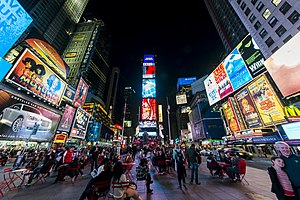

**Introdução**

Este notebook tem como objetivo realizar uma análise descritiva e uma exploração detalhada dos dados do setor imobiliário de Nova York. O foco é compreender as principais características do mercado, identificar padrões e gerar insights a partir dos dados disponíveis.

Conteúdo:
*   Exploração dos Dados
*   Análise Exploratória de Dados (EDA)
*   Modelagem
*   Previsões



 Bibliotecas Utilizadas:
*   Pandas → Manipulação e análise de dados.
*   Matplotlib → Geração de gráficos estáticos.
*   Seaborn → Visualizações estatísticas aprimoradas.
*   Datetime → Manipulação de datas.
*   Sklearn (LabelEncoder) → Codificação de variáveis categóricas.
*   Re (Regex) → Processamento de strings usando expressões regulares.
*   Collections (Counter) → Contagem de frequência de elementos.
*   Ydata Profiling → Geração de relatórios automatizados de análise exploratória dos dados.

Modelos Utilizados para fazer previsões






Iniciaremos a análise

**Importando as bibliotecas necessárias para a análise**

In [ ]:
pip install ydata-profiling


In [2]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import scipy.stats as stats
import statsmodels.api as sm
import pickle
from datetime import datetime
from collections import Counter
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import boxcox
from ydata_profiling import ProfileReport



##1.  **Exploração dos dados**

Este conjunto de dados contém informações sobre anúncios de imóveis em Nova York, fornecendo insights valiosos sobre o mercado de aluguel na região. Ele inclui detalhes como nome do anúncio, tipo de acomodação, preço por noite, localização geográfica e informações sobre os anfitriões e avaliações.

1. 1 Descrição dos Dados
*   id → Identificador único de cada anúncio no aplicativo.
*   nome → Nome do anúncio.
*   host_id → Identificador do usuário que publicou o anúncio.
*   host_name → Nome do anfitrião responsável pelo anúncio.
*   bairro_group → Nome do bairro onde o anúncio está localizado.
*   bairro → Nome da área específica onde o anúncio está localizado.
*   latitude → Coordenada de latitude do imóvel.
*   longitude → Coordenada de longitude do imóvel.
*   room_type → Tipo de acomodação oferecida no anúncio.
*   price → Preço por noite, em dólares, listado pelo anfitrião.
*   minimo_noites → Número mínimo de noites que o usuário deve reservar.
*   numero_de_reviews → Quantidade total de avaliações recebidas pelo anúncio.
*   ultima_review → Data da última avaliação recebida.
*   reviews_por_mes → Número médio de avaliações recebidas por mês.
*   calculado_host_listings_count → Quantidade de anúncios cadastrados por cada anfitrião.
*   disponibilidade_365 → Número de dias no ano em que o anúncio está disponível para reserva.


#### 1.2 Banco de dados


In [48]:
# importando o arquivo
df = pd.read_csv("teste_indicium_precificacao.csv")
# comando Head para observar as primeiras linhas do banco de dados
df.head()

id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1              NaN                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

Observando características do banco de dados


In [7]:
df.shape

(48894, 16)

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

None

Os dados ausentes ou valores nulos são definidos como valores que não foram armazenados (ou não estão presentes) para determinadas variáveis no conjunto de dados. Existem várias estratégias populares para lidar com valores ausentes em um dataset:

*  Remover os valores ausentes
*  Imputar os valores ausentes (preenchê-los com estimativas)
*  Imputação específica para variáveis categóricas
*  Imputação utilizando bibliotecas como Sci-kit Learn
*  Tratar a ausência como uma nova categoria ("missingness" como feature)

In [9]:
display(df.isnull().sum())

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

### 2. Análise Exploratória de Dados (EDA)

A Análise Exploratória de Dados (EDA) é uma abordagem que busca identificar padrões gerais nos dados. Esses padrões podem incluir outliers (valores atípicos) e características inesperadas dentro do conjunto de dados. A EDA é um passo fundamental em qualquer análise de dados, pois permite compreender melhor a estrutura e a qualidade dos dados antes da modelagem.




In [10]:
data = df[['longitude', 'latitude', 'price', 'bairro']].copy()

data = data.sort_values(by=['price'], ascending=False).head(500)

data.rename(columns={'longitude': 'lon', 'latitude': 'lat',
                     'price': 'value', 'bairro': 'name'}, inplace=True)

m = folium.Map(location=[40.7128, -74.0060], tiles="OpenStreetMap", zoom_start=11)

for i in range(len(data)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=f"{data.iloc[i]['name']} - ${data.iloc[i]['value']:,.2f}",
   ).add_to(m)

map_title = "500 Imóveis Mais Caros de Nova York"
title_html = f'<h4 style="position:absolute;z-index:10000;left:40vw"><b>{map_title}</b></h4>'
m.get_root().html.add_child(folium.Element(title_html))

sw = data[['lat', 'lon']].min().values.tolist()
ne = data[['lat', 'lon']].max().values.tolist()
m.fit_bounds([sw, ne])
m

In [11]:
data = df[['longitude', 'latitude', 'price', 'bairro']].copy()

data = data.sort_values(by=['price'], ascending=True).head(500)

data.rename(columns={'longitude': 'lon', 'latitude': 'lat',
                     'price': 'value', 'bairro': 'name'}, inplace=True)

m = folium.Map(location=[40.7128, -74.0060], tiles="OpenStreetMap", zoom_start=11)

for i in range(len(data)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=f"{data.iloc[i]['name']} - ${data.iloc[i]['value']:,.2f}",
   ).add_to(m)


map_title = "500 Imóveis Mais Baratos de Nova York"
title_html = f'<h4 style="position:absolute;z-index:10000;left:40vw"><b>{map_title}</b></h4>'
m.get_root().html.add_child(folium.Element(title_html))


sw = data[['lat', 'lon']].min().values.tolist()
ne = data[['lat', 'lon']].max().values.tolist()
m.fit_bounds([sw, ne])

m

In [49]:
varRmv = ['id', 'host_id', 'host_name', 'latitude', 'longitude']
df_novo = df.drop(columns=varRmv)

Este código tem como objetivo gerar um relatório exploratório automatizado da base de dados utilizando a biblioteca ydata_profiling (antigo pandas_profiling). Primeiramente, ele remove colunas irrelevantes para a análise, como id, host_id, host_name, latitude e longitude, pois essas informações não contribuem diretamente para a exploração dos dados. Em seguida, ele cria um relatório detalhado através do comando ProfileReport(df_novo, explorative=True), que gera uma análise estatística avançada

In [37]:
profile = ProfileReport(df_novo, explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A análise dos dados do mercado imobiliário de Nova York revela que a maioria dos anúncios está concentrada em Manhattan e Brooklyn, enquanto Staten Island possui pouca oferta. A maior parte das acomodações são casas ou apartamentos inteiros, com um preço médio por noite de $152,72 exigem um mínimo de sete noites para reserva, e alguns aceitam apenas locações de longo prazo.

Em relação às avaliações, 20,6% dos anúncios não possuem reviews, enquanto a média geral é de 23 avaliações por listagem. Há uma presença significativa de anfitriões com múltiplos anúncios, com alguns chegando a 327 propriedades cadastradas, o que indica atuação de empresas no mercado. A disponibilidade anual média é de 112 dias, mas 35,9% das listagens estão inativas ao longo do ano, sugerindo sazonalidade ou pausas nos anúncios.

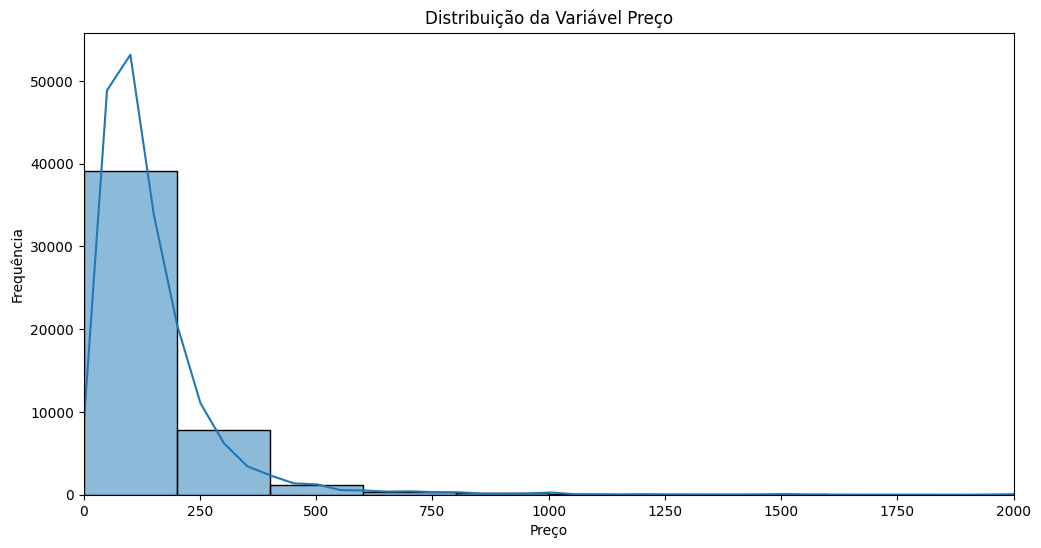

In [10]:
# Distribuição do preço
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.xlim(0, 2000)
plt.title("Distribuição da Variável Preço")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

A variável preço possui grande variação, indo de \$0 a \$10.000, com média de \$152,72, indicando a presença de outliers e uma distribuição assimétrica. Essa dispersão pode impactar análises e modelos preditivos, tornando necessária uma transformação logarítmica para reduzir a influência de valores extremos, estabilizar a variância e melhorar a relação entre variáveis.

In [14]:
tipos_mais_caros = df.groupby("room_type")["price"].mean().sort_values(ascending=False)
print("Preço médio por tipo de acomodação:")
print(tipos_mais_caros)

Preço médio por tipo de acomodação:
room_type
Entire home/apt    211.794246
Private room        89.778320
Shared room         70.127586
Name: price, dtype: float64


Preço médio por Bairro Group:
bairro_group
Manhattan        196.875814
Brooklyn         124.381983
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


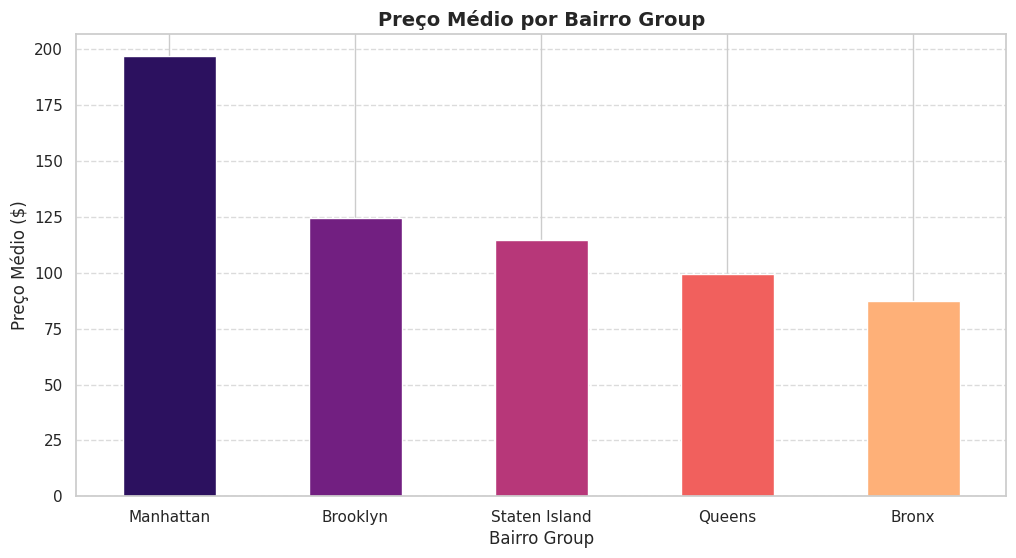

<ipython-input-38-e25f092d766f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bairro_group", y="price", data=df, palette="magma", width=0.6, linewidth=2)


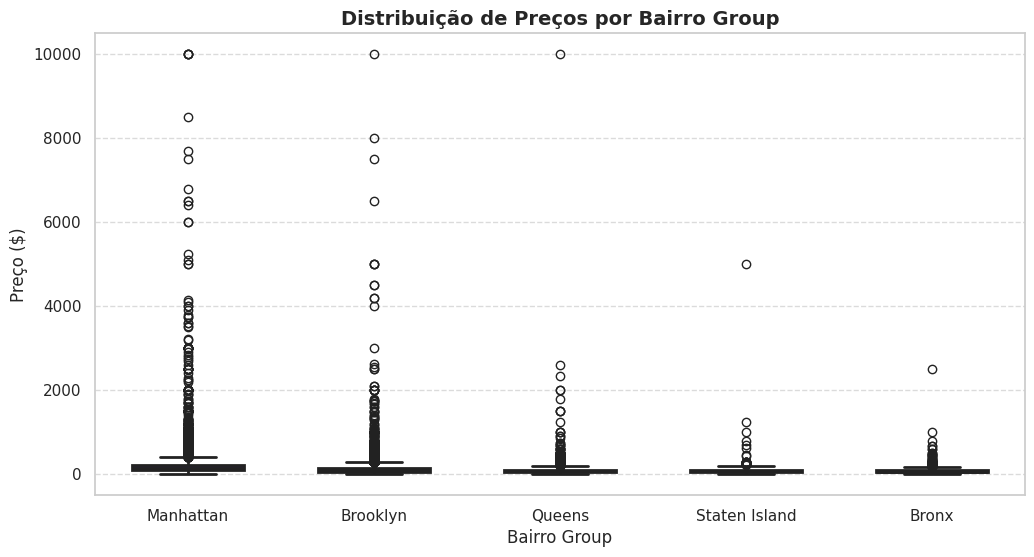


Taxas de Ocupação Médias por Região e Tipo de Imóvel:
 bairro_group   room_type      
Bronx          Entire home/apt    0.567123
               Private room       0.530599
               Shared room        0.577489
Brooklyn       Entire home/apt    0.733685
               Private room       0.726324
               Shared room        0.512309
Manhattan      Entire home/apt    0.679066
               Private room       0.720973
               Shared room        0.620348
Queens         Entire home/apt    0.637624
               Private room       0.591171
               Shared room        0.473461
Staten Island  Entire home/apt    0.512126
               Private room       0.379831
               Shared room        0.822527
Name: taxa_ocupacao, dtype: float64


In [38]:

bairro_group_mais_caro = df.groupby("bairro_group")["price"].mean().sort_values(ascending=False)

print("Preço médio por Bairro Group:")
print(bairro_group_mais_caro)


sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 6))
bairro_group_mais_caro.plot(kind="bar", color=sns.color_palette("magma", len(bairro_group_mais_caro)))
plt.title("Preço Médio por Bairro Group", fontsize=14, fontweight='bold')
plt.xlabel("Bairro Group", fontsize=12)
plt.ylabel("Preço Médio ($)", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x="bairro_group", y="price", data=df, palette="magma", width=0.6, linewidth=2)
plt.title("Distribuição de Preços por Bairro Group", fontsize=14, fontweight='bold')
plt.xlabel("Bairro Group", fontsize=12)
plt.ylabel("Preço ($)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Estimar Taxas de Ocupação (Exemplo Simplificado)
df['taxa_ocupacao'] = 1 - (df['disponibilidade_365'] / 365)
taxas_ocupacao_medias = df.groupby(['bairro_group', 'room_type'])['taxa_ocupacao'].mean()
print("\nTaxas de Ocupação Médias por Região e Tipo de Imóvel:\n", taxas_ocupacao_medias)


O boxplot mostra que **Manhattan e Brooklyn** possuem os preços mais elevados e a maior variação, com outliers chegando a **$10.000** por noite. **Queens, Staten Island e Bronx** apresentam preços medianos mais baixos, mas ainda possuem alguns imóveis com valores elevados. A mediana dos preços está próxima do limite inferior em todas as regiões, indicando que a maioria dos imóveis tem preços mais acessíveis, enquanto poucos anúncios de alto valor elevam a dispersão dos dados.

**Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?**


Com base nos dados disponíveis, Brooklyn parece ser a área mais promissora para investir em aluguéis de curto prazo em Nova York. Embora Manhattan apresente os preços médios mais altos, Brooklyn equilibra preços razoáveis com altas taxas de ocupação tanto para apartamentos inteiros quanto para quartos privados, indicando uma forte demanda. Bronx, Queens e Staten Island parecem ser opções mais arriscadas. No entanto, é crucial considerar o custo de aquisição dos imóveis em cada região para calcular o retorno sobre o investimento potencial.

**Existe algum padrão no texto do nome do local para lugares de mais alto valor?**


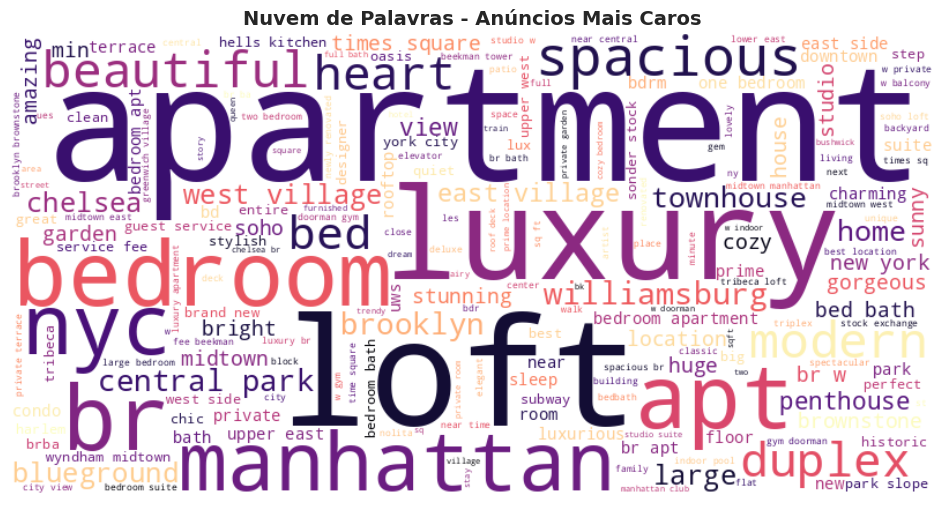

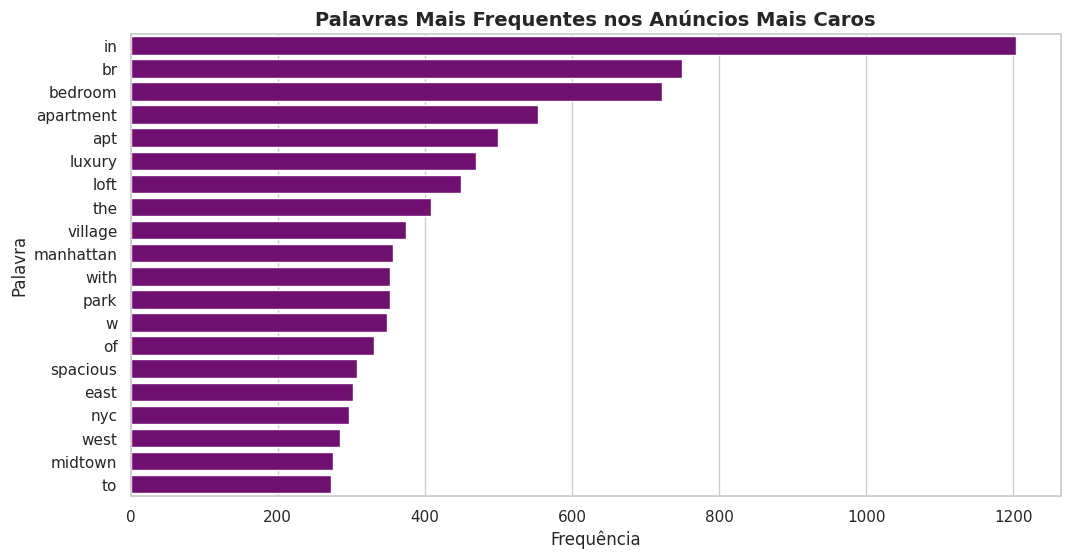

📌 Acurácia do modelo ao prever imóveis caros pelo nome: 91.19%


In [19]:
df_filtered = df[['nome', 'price']].dropna()

limite_alto = np.percentile(df_filtered['price'], 90)

df_filtered['categoria'] = np.where(df_filtered['price'] >= limite_alto, 'Alto Valor', 'Baixo/Médio Valor')

def limpar_texto(texto):
    texto = str(texto).lower()
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

df_filtered['nome_limpo'] = df_filtered['nome'].apply(limpar_texto)


textos_altos = " ".join(df_filtered[df_filtered['categoria'] == 'Alto Valor']['nome_limpo'])
textos_baixos = " ".join(df_filtered[df_filtered['categoria'] == 'Baixo/Médio Valor']['nome_limpo'])

palavras_altas = textos_altos.split()
palavras_baixas = textos_baixos.split()


contagem_palavras_altas = Counter(palavras_altas).most_common(20)
contagem_palavras_baixas = Counter(palavras_baixas).most_common(20)

df_palavras = pd.DataFrame(contagem_palavras_altas, columns=['Palavra', 'Frequência_Alta'])
df_palavras['Frequência_Baixa'] = [Counter(palavras_baixas)[word] for word in df_palavras['Palavra']]

plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(textos_altos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuvem de Palavras - Anúncios Mais Caros", fontsize=14, fontweight="bold")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(y=df_palavras['Palavra'], x=df_palavras['Frequência_Alta'], color="purple")
plt.title("Palavras Mais Frequentes nos Anúncios Mais Caros", fontsize=14, fontweight="bold")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.show()



Sim, existe um padrão no texto do nome dos anúncios para os imóveis mais caros. A nuvem de palavras e a análise de frequência mostram que termos como "apartment", "loft", "luxury", "penthouse", "spacious", "duplex", "townhouse" e "Manhattan" aparecem com alta frequência nos anúncios mais valorizados. Essas palavras indicam que imóveis de maior valor tendem a enfatizar exclusividade, tamanho, localização e sofisticação em seus títulos.


# 3. Limpeza do Banco de Dados

1. removendo colunas desnecessárias

In [50]:
df = df.drop(columns=["id", "host_id", "host_name", "latitude","longitude","nome","bairro"   ], errors="ignore")
df.head()

bairro_group        room_type  price  minimo_noites  numero_de_reviews  \
0    Manhattan  Entire home/apt    225              1                 45   
1    Manhattan     Private room    150              3                  0   
2     Brooklyn  Entire home/apt     89              1                270   
3    Manhattan  Entire home/apt     80             10                  9   
4    Manhattan  Entire home/apt    200              3                 74   

  ultima_review  reviews_por_mes  calculado_host_listings_count  \
0    2019-05-21             0.38                              2   
1           NaN              NaN                              1   
2    2019-07-05             4.64                              1   
3    2018-11-19             0.10                              1   
4    2019-06-22             0.59                              1   

   disponibilidade_365  
0                  355  
1                  365  
2                  194  
3                    0  
4                  129

2. utilizando a classe LabelEncoder da biblioteca sklearn.preprocessing para converter variáveis categóricas em valores numéricos

In [51]:
le = LabelEncoder()
df.bairro_group = le.fit_transform(df.bairro_group)
df.room_type = le.fit_transform(df.room_type)
df

bairro_group  room_type  price  minimo_noites  numero_de_reviews  \
0                 2          0    225              1                 45   
1                 2          1    150              3                  0   
2                 1          0     89              1                270   
3                 2          0     80             10                  9   
4                 2          0    200              3                 74   
...             ...        ...    ...            ...                ...   
48889             1          1     70              2                  0   
48890             1          1     40              4                  0   
48891             2          0    115             10                  0   
48892             2          2     55              1                  0   
48893             2          1     90              7                  0   

      ultima_review  reviews_por_mes  calculado_host_listings_count  \
0        2019-05-21             0.38                              2   
1               NaN              NaN                              1   
2        2019-07-05             4.64                              1   
3        2018-11-19             0.10                              1   
4        2019-06-22             0.59                              1   
...             ...              ...                            ...   
48889           NaN              NaN                              2   
48890           NaN              NaN                              2   
48891           NaN              NaN                              1   
48892           NaN              NaN                              6   
48893           NaN              NaN                              1   

       disponibilidade_365  
0                      355  
1                      365  
2                      194  
3                        0  
4                      129  
...                    ...  
48889                    9  
48890                   36  
48891                   27  
48892                    2  
48893                   23  

[48894 rows x 9 columns]

3.  A **transformação da variável resposta** (preço) é necessária devido à sua distribuição altamente assimétrica e presença de outliers, o que pode impactar o desempenho dos modelos preditivos. Algumas opções para tratar esse problema incluem:



*   Transformação Logarítmica
*   Transformação Box-Cox
*   Transformação para Classes
tentaremos todas a fim de obter o melhor modelo





Valor de Lambda: 0.2
 Testes de Normalidade para Diferentes Transformações 

 Testando Normalidade para a variável price (ajustado):
Shapiro-Wilk: Estatística=0.3005, p-valor=0.0000
Kolmogorov-Smirnov: Estatística=0.2964, p-valor=0.0000
Anderson-Darling: Estatística=7277.3055, Valor Crítico=[0.576 0.656 0.787 0.918 1.092]
D'Agostino e Pearson: Estatística=105080.2278, p-valor=0.0000

 Testando Normalidade para a variável price (log):
Shapiro-Wilk: Estatística=0.9764, p-valor=0.0000
Kolmogorov-Smirnov: Estatística=0.0589, p-valor=0.0000
Anderson-Darling: Estatística=130.9573, Valor Crítico=[0.576 0.656 0.787 0.918 1.092]
D'Agostino e Pearson: Estatística=4115.5010, p-valor=0.0000

 Testando Normalidade para a variável price (box-cox):
Shapiro-Wilk: Estatística=0.9848, p-valor=0.0000
Kolmogorov-Smirnov: Estatística=0.0378, p-valor=0.0000
Anderson-Darling: Estatística=41.1321, Valor Crítico=[0.576 0.656 0.787 0.918 1.092]
D'Agostino e Pearson: Estatística=3316.6439, p-valor=0.0000

 Testa

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48894.
  res = hypotest_fun_out(*samples, **kwds)


Anderson-Darling: Estatística=1609.0344, Valor Crítico=[0.576 0.656 0.787 0.918 1.092]
D'Agostino e Pearson: Estatística=44165.3191, p-valor=0.0000


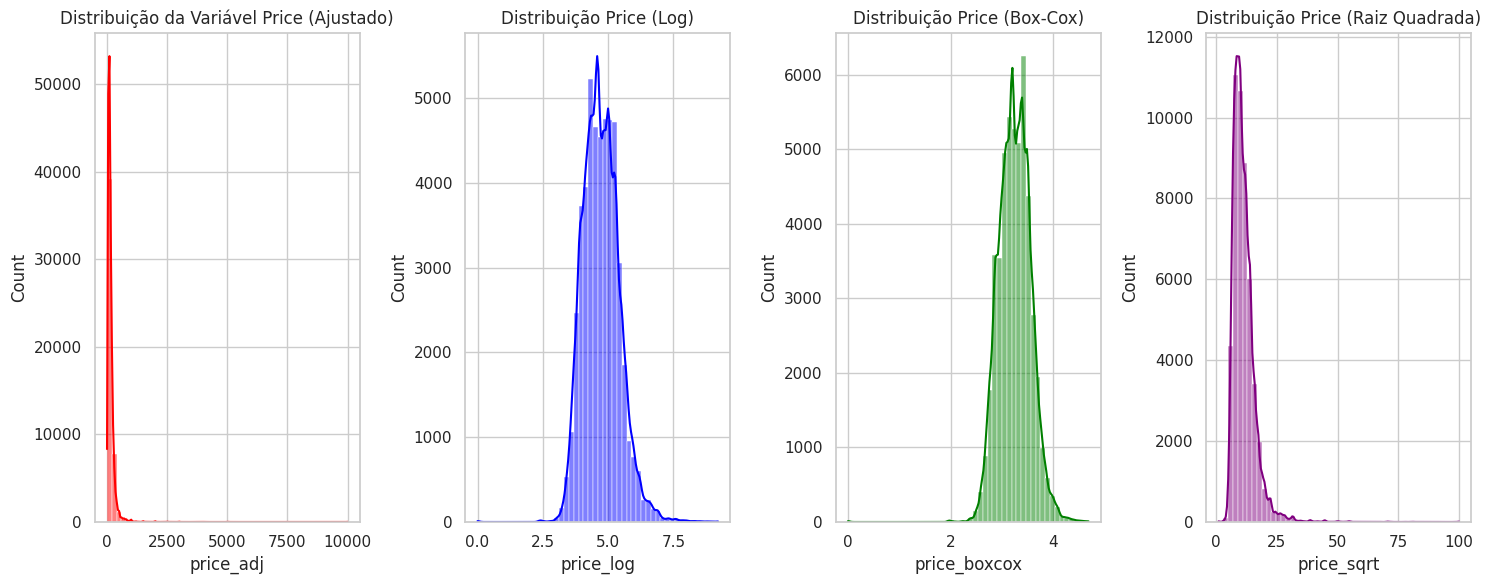

In [52]:

df['price_adj'] = df['price'] + 1
df['price_log'] = np.log(df['price_adj'])
df['price_boxcox'], lambda_boxcox = boxcox(df['price_adj'])
print("Valor de Lambda:", lambda_value)
df['price_sqrt'] = np.sqrt(df['price_adj'])

def testar_normalidade(data, col):
    print(f"\n Testando Normalidade para a variável {col}:")


    stat, p = stats.shapiro(data)
    print(f"Shapiro-Wilk: Estatística={stat:.4f}, p-valor={p:.4f}")


    stat, p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f"Kolmogorov-Smirnov: Estatística={stat:.4f}, p-valor={p:.4f}")

    resultado = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling: Estatística={resultado.statistic:.4f}, Valor Crítico={resultado.critical_values}")


    stat, p = stats.normaltest(data)
    print(f"D'Agostino e Pearson: Estatística={stat:.4f}, p-valor={p:.4f}")


print(" Testes de Normalidade para Diferentes Transformações ")
testar_normalidade(df['price_adj'], 'price (ajustado)')
testar_normalidade(df['price_log'], 'price (log)')
testar_normalidade(df['price_boxcox'], 'price (box-cox)')
testar_normalidade(df['price_sqrt'], 'price (raiz quadrada)')


plt.figure(figsize=(15, 6))


plt.subplot(1, 4, 1)
sns.histplot(df['price_adj'], kde=True, bins=50, color="red")
plt.title("Distribuição da Variável Price (Ajustado)")


plt.subplot(1, 4, 2)
sns.histplot(df['price_log'], kde=True, bins=50, color="blue")
plt.title("Distribuição Price (Log)")


plt.subplot(1, 4, 3)
sns.histplot(df['price_boxcox'], kde=True, bins=50, color="green")
plt.title("Distribuição Price (Box-Cox)")


plt.subplot(1, 4, 4)
sns.histplot(df['price_sqrt'], kde=True, bins=50, color="purple")
plt.title("Distribuição Price (Raiz Quadrada)")

plt.tight_layout()
plt.show()


A normalidade da variável resposta é essencial na regressão linear para garantir estimativas confiáveis. Testamos diferentes transformações na variável **price**, observando que sua distribuição original era altamente assimétrica. A transformação logarítmica melhorou a dispersão, mas sem atingir normalidade ideal. A transformação Box-Cox foi a mais eficaz, aproximando melhor a distribuição da normalidade, enquanto a raiz quadrada teve um efeito menor. Assim, a Box-Cox é a mais recomendada para regressão linear, enquanto a transformação logarítmica pode ser suficiente para modelos mais robustos, como Random Forest e XGBoost.

In [8]:

median_price = df['price'].median()
df['price_category'] = df['price'].apply(lambda x: 0 if x <= median_price else 1)
print(df['price_category'].value_counts())


price_category
0    24472
1    24422
Name: count, dtype: int64


 transformação da variável price em uma variável categórica binária (0 para preços abaixo ou iguais à média e 1 para preços acima da média) foi feita para possibilitar a aplicação de um modelo de Regressão Logística. Esse modelo é mais adequado quando queremos prever categorias em vez de valores contínuos, permitindo entender quais fatores influenciam a probabilidade de um imóvel pertencer à categoria de preço mais alto.

####4. Verificação de interação linear, quadrática e logarítmica

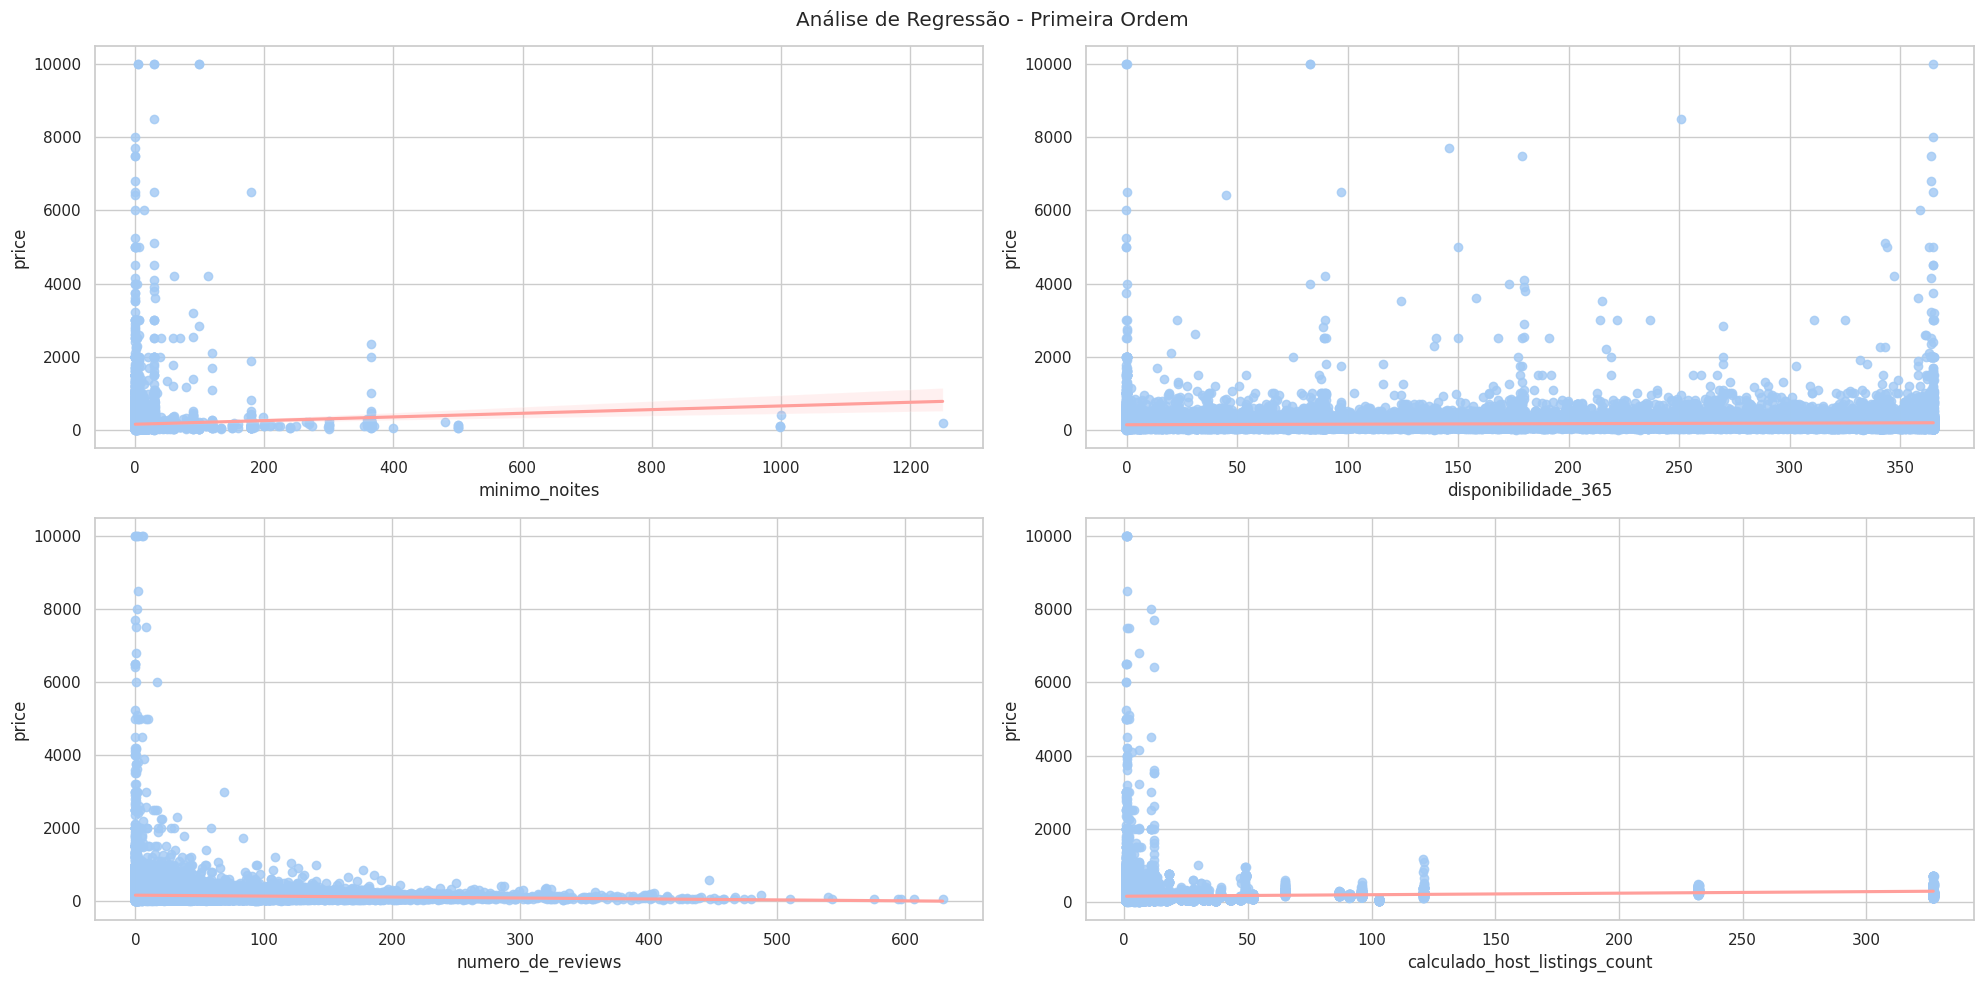

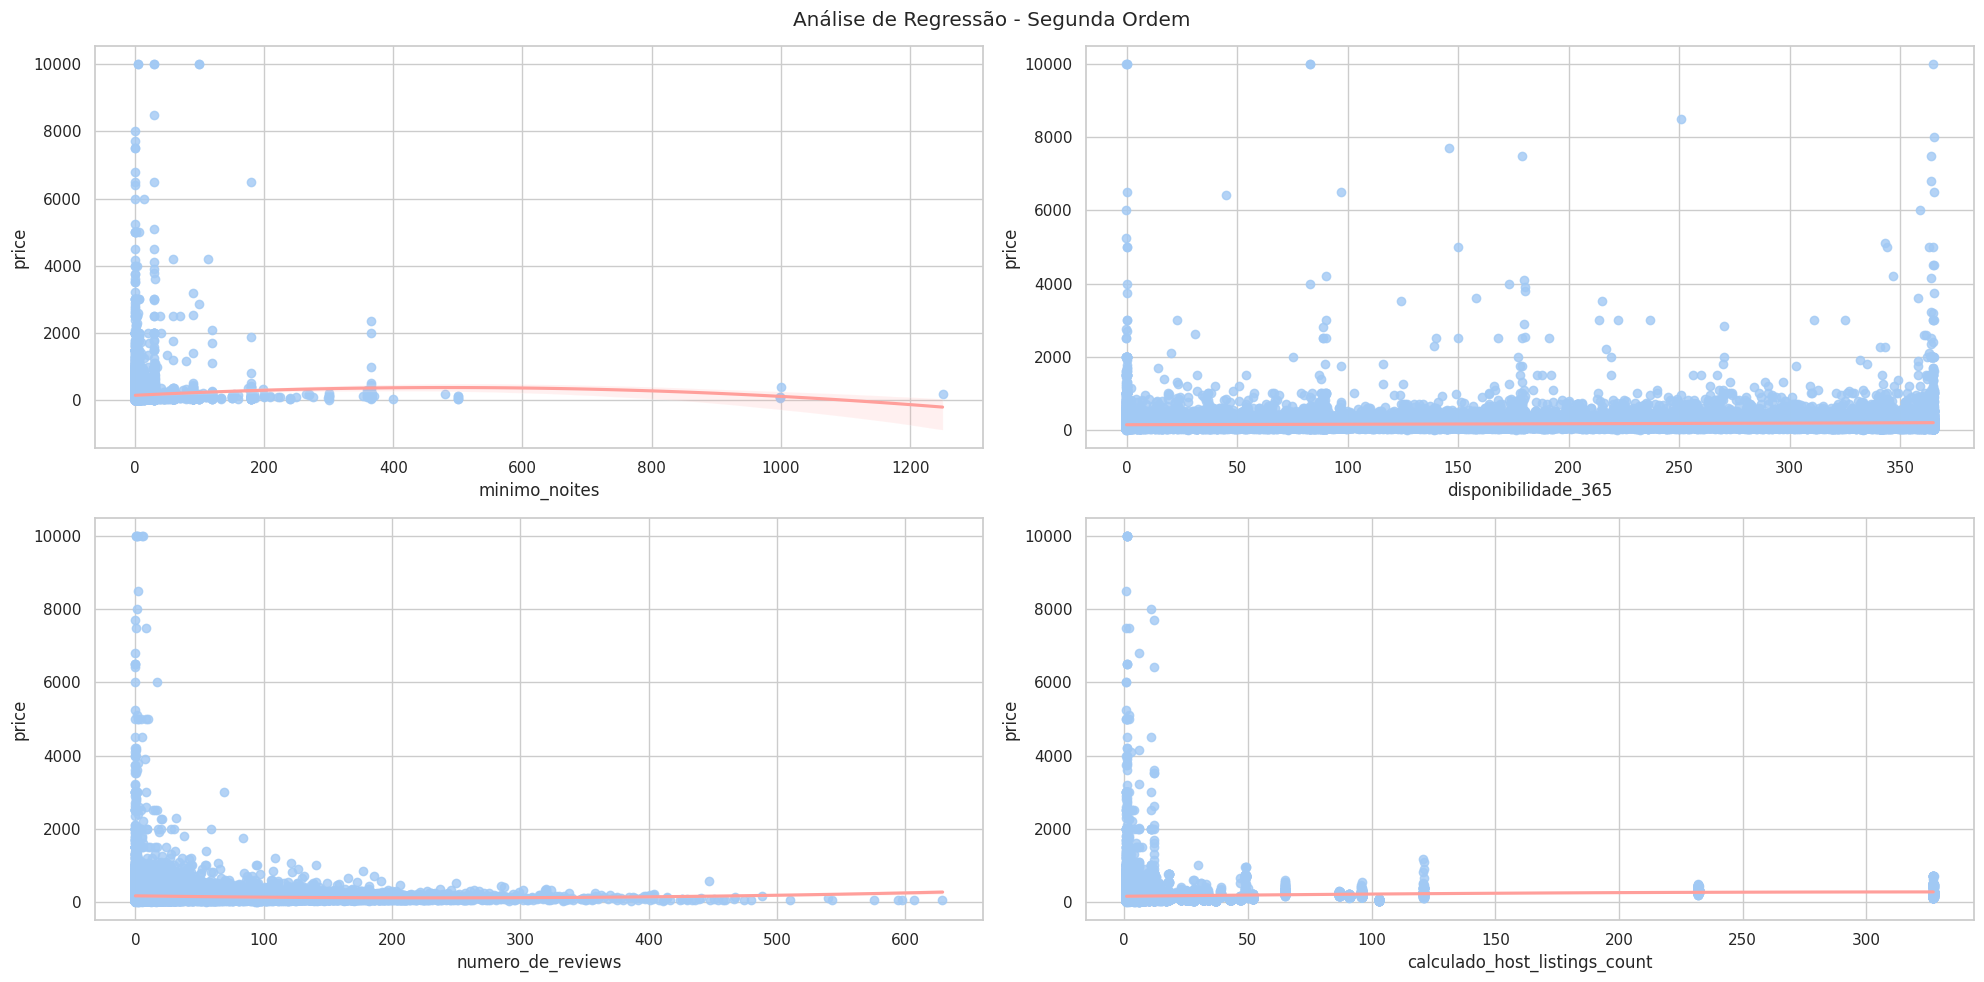

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:315: RuntimeWarning: divide by zero encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:318: RuntimeWarning: divide by zero encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


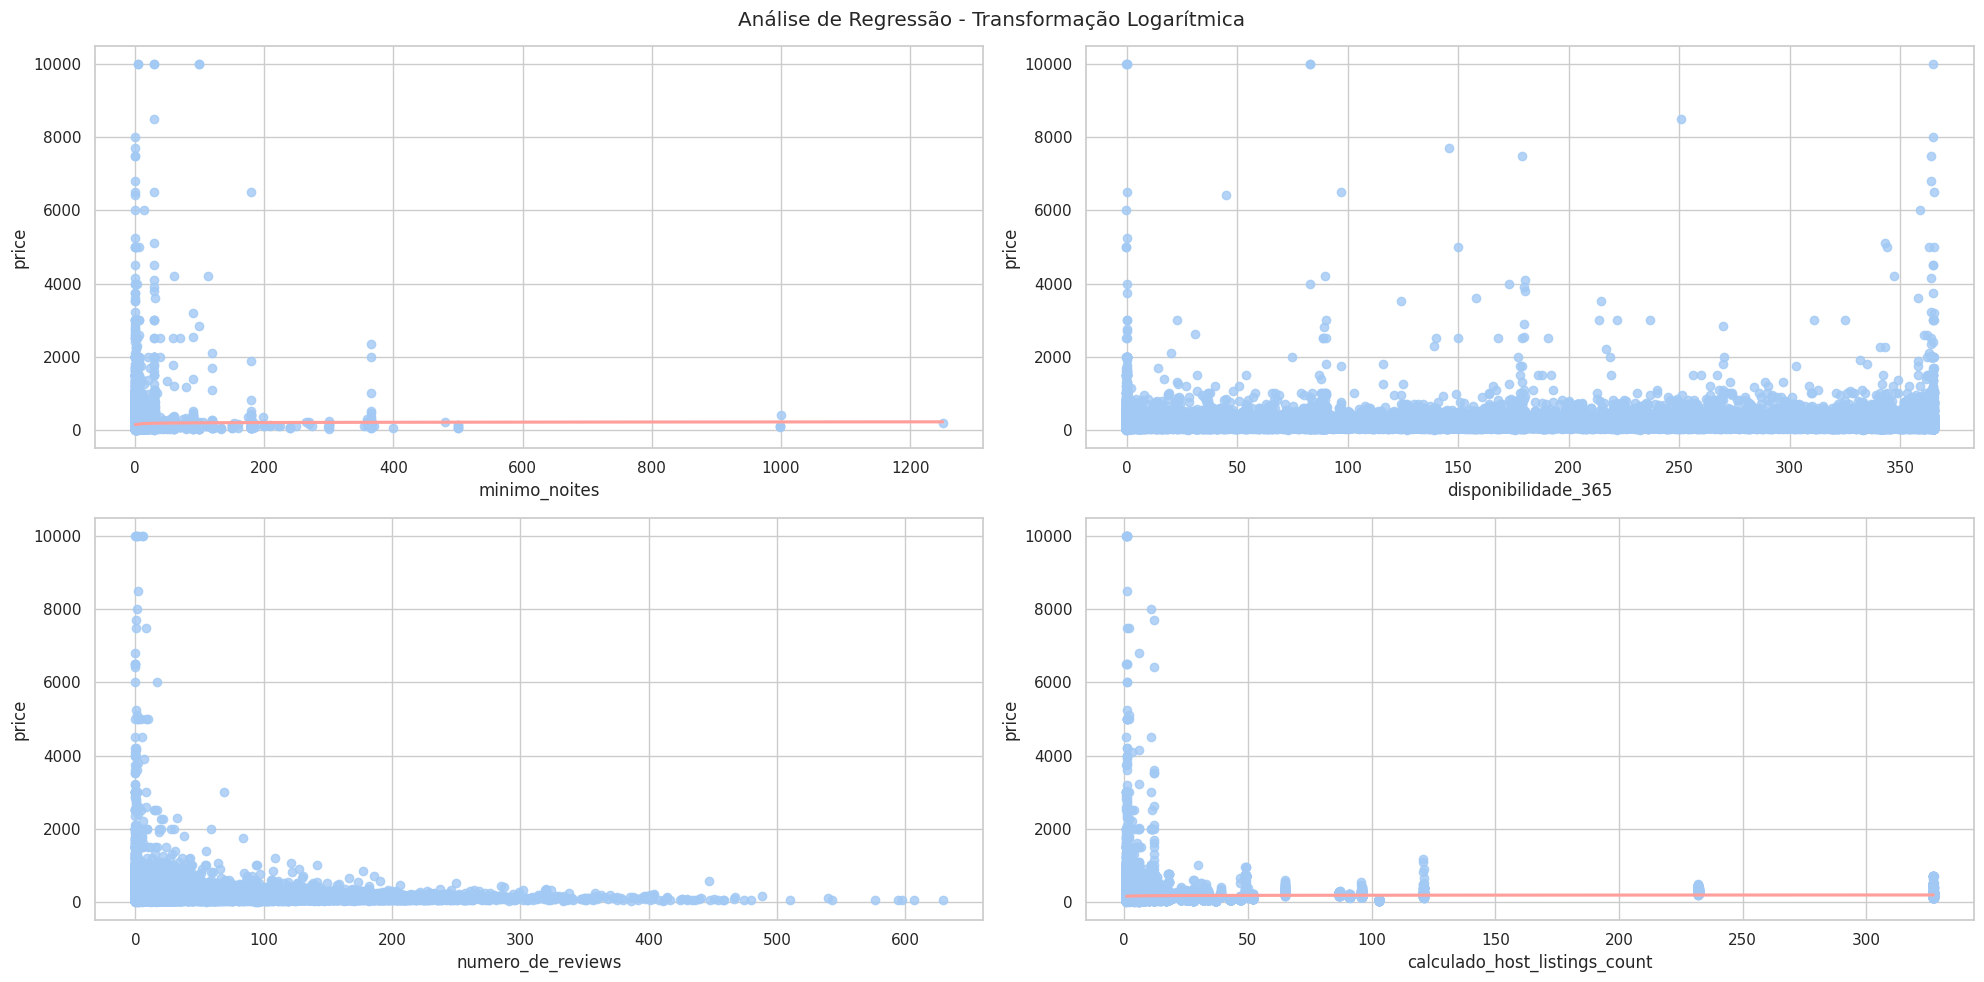

In [47]:

fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221)
sns.regplot(data=df, x="minimo_noites", y="price", x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

fig2 = fig.add_subplot(222)
sns.regplot(data=df, x="disponibilidade_365", y="price", x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

fig3 = fig.add_subplot(223)
sns.regplot(data=df, x="numero_de_reviews", y="price", x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

fig4 = fig.add_subplot(224)
sns.regplot(data=df, x="calculado_host_listings_count", y="price", x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

plt.suptitle('Análise de Regressão - Primeira Ordem')
plt.tight_layout()
plt.show()



fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221)
sns.regplot(data=df, x="minimo_noites", y="price", order=2, x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

fig2 = fig.add_subplot(222)
sns.regplot(data=df, x="disponibilidade_365", y="price", order=2, x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

fig3 = fig.add_subplot(223)
sns.regplot(data=df, x="numero_de_reviews", y="price", order=2, x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

fig4 = fig.add_subplot(224)
sns.regplot(data=df, x="calculado_host_listings_count", y="price", order=2, x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

plt.suptitle('Análise de Regressão - Segunda Ordem')
plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221)
sns.regplot(data=df, x="minimo_noites", y="price", logx=True, x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

fig2 = fig.add_subplot(222)
sns.regplot(data=df, x="disponibilidade_365", y="price", logx=True, x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

fig3 = fig.add_subplot(223)
sns.regplot(data=df, x="numero_de_reviews", y="price", logx=True, x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

fig4 = fig.add_subplot(224)
sns.regplot(data=df, x="calculado_host_listings_count", y="price", logx=True, x_jitter=.15, line_kws=dict(color="r"))
plt.ticklabel_format(style='plain')

plt.suptitle('Análise de Regressão - Transformação Logarítmica')
plt.tight_layout()
plt.show()


Os gráficos analisam a relação entre o preço de imóveis e variáveis como mínimo de noites, disponibilidade anual, número de reviews e quantidade de imóveis gerenciados pelo anfitrião, utilizando um modelo de regressão de segunda ordem. A distribuição dos dados é altamente assimétrica, com muitos valores concentrados em preços baixos e alguns outliers. O modelo não conseguiu capturar uma relação clara, pois as curvas ajustadas são praticamente planas, indicando que essas variáveis, isoladamente, não têm um impacto forte ou linear no preço. A dispersão dos pontos sugere que outros fatores não incluídos podem influenciar o preço.

### 3. Modelagem dos dados


##Regressão Logística

In [55]:
df_reduzido = df.drop(columns=['price_log', 'price_boxcox', 'price_sqrt'], errors='ignore')

media_price = df_reduzido['price'].mean()
df_reduzido['price_category'] = df_reduzido['price'].apply(lambda x: 0 if x <= media_price else 1)

X = df_reduzido[['minimo_noites', 'disponibilidade_365', 'numero_de_reviews', 'calculado_host_listings_count', 'bairro_group','room_type' ]]
y = df_reduzido['price_category']


X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


logit_model = sm.Logit(y_train, X_train)
result_log = logit_model.fit()


print(result_log.summary())
print("\nCoefficients:")
print(result_log.params)


predictions = result_log.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted_classes))

print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))

print("\nAccuracy:", accuracy_score(y_test, predicted_classes))
print("F1 Score:", f1_score(y_test, predicted_classes))

Optimization terminated successfully.
         Current function value: 0.456507
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         price_category   No. Observations:                34225
Model:                          Logit   Df Residuals:                    34218
Method:                           MLE   Df Model:                            6
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                  0.2573
Time:                        18:50:56   Log-Likelihood:                -15624.
converged:                       True   LL-Null:                       -21038.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.4596      0.039    -11.904      0.

Desenvolvemos um modelo de regressão logística para prever se o preço de aluguéis em Nova York é classificado como baixo (0) ou alto (1) com base em seis variáveis explicativas. O modelo apresenta uma acurácia geral de 74,88%, mas ainda enfrenta dificuldades na identificação de imóveis caros, com um recall de apenas 47% para essa classe, embora o F1-score de 53,30% indique um equilíbrio razoável entre precisão e recall.** Respondendo à pergunta sobre a interferência do número mínimo de noites e da disponibilidade ao longo do ano no preço**, verificamos que a disponibilidade ao longo do ano interfere positivamente, com imóveis mais disponíveis tendendo a ser classificados como caros, possivelmente por estarem em locações mais exclusivas ou bem localizadas, conforme evidenciado pelo coeficiente positivo de 0,0025. Já o número mínimo de noites interfere negativamente, pois imóveis que exigem um número maior de noites mínimas tendem a ser classificados como mais baratos, indicado pelo coeficiente negativo de -0,0070. Além disso, a localização também impacta significativamente o preços, como Manhattan, aumentando a probabilidade de o imóvel ser caro (coeficiente positivo de 0,2315), enquanto o tipo de quarto influencia fortemente, com imóveis inteiros ("Entire home/apt") tendendo a ser mais caros e quartos privados reduzindo essa chance (coeficiente negativo de -2,7711). O modelo explica 25,73% da variabilidade nos dados.

Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?


In [21]:
def calcular_probabilidade(caracteristicas, coeficientes):
    z = np.dot(caracteristicas, coeficientes)
    return 1 / (1 + np.exp(-z))

def sugerir_preco(probabilidade, media_price, desconto=0.8):
    if probabilidade >= 0.5:
        return media_price * 1.2
    else:
        return media_price * desconto

if __name__ == "__main__":
    coeficientes = [
        -0.4596,
        -0.0070,
         0.0025,
        -0.0047,
         0.0077,
         0.2315,
        -2.7711
    ]

    media_price = 150

    caracteristicas = [
        1,
        1,
        355,
        45,
        2,
        2,
        0
    ]

    probabilidade = calcular_probabilidade(caracteristicas, coeficientes)
    preco_sugerido = sugerir_preco(probabilidade, media_price)

    print(f"Probabilidade de ser da classe 1 (acima da média): {probabilidade:.2%}")
    print(f"Preço sugerido: ${preco_sugerido:.2f}")


Probabilidade de ser da classe 1 (acima da média): 66.55%
Preço sugerido: $180.00


O presente código utiliza um modelo de regressão logística previamente treinado para calcular a probabilidade de um imóvel pertencer à categoria de preço "alto" (1) ou "baixo" (0) com base em suas características. A função `calcular_probabilidade` combina as características do imóvel (como número mínimo de noites, disponibilidade ao longo do ano, bairro e tipo de quarto) com os coeficientes do modelo para estimar essa probabilidade usando a função logística. Em seguida, a função `sugerir_preco` usa essa probabilidade para decidir o preço sugerido: se a probabilidade for maior ou igual a 50%, o preço será 20% acima da média; caso contrário, será 20% abaixo da média.

No exemplo fornecido, o código calcula uma probabilidade de **66,55%** de o imóvel ser classificado como "caro" (classe 1). Com base nessa probabilidade, o preço sugerido é **\$180,00**, que é **20% acima da média de \$150,00**. Isso indica que, considerando as características do imóvel (como localização em Manhattan e o tipo de quarto), ele tem uma chance significativa de estar na categoria de preços mais altos.

## Regressão Linear Simples

In [22]:
X = df_reduzido[['minimo_noites', 'disponibilidade_365', 'numero_de_reviews',
                  'calculado_host_listings_count', 'bairro_group', 'room_type']]
y = df['price_boxcox']

X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = sm.OLS(y_train, X_train)
resultsLS = model.fit()

print(results.summary())
predictions = results.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     3974.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:38:29   Log-Likelihood:                 503.50
No. Observations:               34225   AIC:                            -993.0
Df Residuals:                   34218   BIC:                            -933.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Analisando os resultados, podemos comparar os coeficientes da regressão linear com os da regressão logística que fizemos antes. Na regressão logística, os coeficientes indicavam como cada variável afetava a probabilidade de um aluguel ser caro ou barato. Já na regressão linear, os coeficientes indicam como cada variável afeta diretamente o preço transformado do aluguel (pela transformação Box-Cox).

Na nossa regressão linear, cada variável contribui para a estimativa do preço do aluguel (transformado para melhor ajuste). O coeficiente de minimo_noites (-0.0005) sugere um ligeiro decréscimo no preço conforme o número mínimo de noites aumenta, o que pode refletir uma estratégia para atrair hóspedes de longa duração. Já a disponibilidade_365 (0.0003) indica que imóveis com maior disponibilidade tendem a ter preços um pouco mais elevados, possivelmente devido à maior procura ou flexibilidade. O numero_de_reviews (-0.0004) sugere que, estranhamente, mais avaliações podem estar associadas a preços ligeiramente menores, talvez porque listagens com muitos comentários já ofereçam um preço competitivo. calculado_host_listings_count (0.0003) aponta que anfitriões com mais propriedades listadas tendem a praticar preços um pouco mais altos, o que pode refletir a sua experiência ou o posicionamento dos seus imóveis. A variável bairro_group (0.0263) indica que a localização tem um impacto significativo no preço, com certos bairros apresentando preços mais elevados do que outros. Por fim, room_type (-0.3558) mostra uma grande influencia nos preços, com certas categorias de quartos sendo geralmente mais baratas do que outras.

In [26]:

novo_apartamento = {
    'minimo_noites': 1,
    'disponibilidade_365': 355,
    'numero_de_reviews': 45,
    'calculado_host_listings_count': 2,
    'bairro_group': 2,
    'room_type': 0
}

X_novo = np.array([1,
                    novo_apartamento['minimo_noites'],
                    novo_apartamento['disponibilidade_365'],
                    novo_apartamento['numero_de_reviews'],
                    novo_apartamento['calculado_host_listings_count'],2,0])


price_boxcox_predito = results.predict(X_novo)

print(f"Preço Box-Cox Predito: {price_boxcox_predito}")
def inverse_boxcox(transformed_value, lambda_value):
    if lambda_value == 0:
        return np.exp(transformed_value)
    else:
        return np.exp(np.log(lambda_value * transformed_value + 1) / lambda_value)


lambda_value = 0.2

preco_predito = inverse_boxcox(price_boxcox_predito, lambda_value)



print(f"Preço sugerido: ${preco_sugerido:.2f}")

Preço Box-Cox Predito: [3.49349878]
Preço sugerido: $180.00


Para sugerir um preço, primeiramente coletamos as informações do apartamento, como número de avaliações, localização e tipo de quarto. Em seguida, organizamos esses números em uma lista seguindo a ordem esperada pelo modelo, adicionando um valor inicial para representar o ponto de partida do cálculo. Com os dados preparados, "alimentamos" o modelo, que aplicouos coeficientes da regressão linear para calcular um preço numa escala transformada. Por fim, revertemos essa transformação, trazendo o valor para a escala original em dólares e obtendo a sugestão de preço de $180.

## Floresta aleatória

In [35]:

X = df[['minimo_noites', 'disponibilidade_365', 'numero_de_reviews',
       'calculado_host_listings_count', 'bairro_group', 'room_type']]
y = df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10) # Tune hyperparameters


rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Prever um novo apartamento
novo_apartamento = pd.DataFrame({
    'minimo_noites': [1],
    'disponibilidade_365': [355],
    'numero_de_reviews': [45],
    'calculado_host_listings_count': [2],
    'bairro_group': [2],
    'room_type': [0]
})

# Fazer a previsão usando o modelo treinado
y_pred_original = rf_model.predict(novo_apartamento.values)

print(f"Sugestão de preço para um novo apartamento: {y_pred_original[0]:.2f}")

Random Forest Model Evaluation:
Mean Squared Error (MSE): 42249.7458
Root Mean Squared Error (RMSE): 205.5474
R-squared (R2): 0.0837
Sugestão de preço para um novo apartamento: 330.02


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


O modelo de Floresta Aleatória, ao tentar estimar diretamente o preço dos aluguéis, demonstra uma capacidade limitada. O R-quadrado de 0.0837 revela que apenas uma pequena fração (aproximadamente 8\%) da variação nos preços é explicada pelas variáveis consideradas no modelo (mínimo de noites, disponibilidade, número de avaliações, quantidade de anúncios do anfitrião, tipo de quarto e região). Isso sugere que existem outros fatores significativos, não incluídos no modelo, que exercem uma influência considerável nos preços dos aluguéis.

Adicionalmente, o Root Mean Squared Error (RMSE) de \$205.55 indica que, em média, as previsões do modelo desviam-se do preço real em aproximadamente \$205. Essa margem de erro relativamente alta reforça a ideia de que o modelo não consegue capturar a complexidade do mercado de aluguéis e, portanto, as previsões individuais devem ser interpretadas com cautela.

Para o apartamento específico avaliado, o modelo sugere um preço de \$330.02. No entanto, dada a baixa capacidade preditiva do modelo (evidenciada pelo baixo R-quadrado e alto RMSE), essa sugestão deve ser encarada como um ponto de referência inicial, e não como um valor definitivo.

In [40]:
import pickle
# Save Random Forest Model
filename_rf = 'modelo_random_forest.pkl'
with open(filename_rf, 'wb') as arquivo:
    pickle.dump(rf_model, arquivo)
print(f"Modelo Random Forest salvo com sucesso em: {filename_rf}")


Modelo Random Forest salvo com sucesso em: modelo_random_forest.pkl


In [56]:
# Save Logistic Regression Model
filename_log = 'modelo_logistic_regression.pkl'
with open(filename_log, 'wb') as arquivo:
    pickle.dump(result_log, arquivo)
print(f"Modelo de Regressão Logística salvo com sucesso em: {filename_log}")

Modelo de Regressão Logística salvo com sucesso em: modelo_logistic_regression.pkl


In [ ]:

# Salvar o modelo
filename = 'modelo_linear_simples.pkl'
with open(filename, 'wb') as arquivo:
    pickle.dump(results, arquivo)
print(f"Modelo salvo com sucesso em: {filename}")